# Healthcare Sectors - Market Analysis

In [ ]:
import yfinance as yf
import pandas as pd
import time

# List of top 33 healthcare company ticker symbols
companies = [
    'JNJ', 'PFE', 'RHHBY', 'NVS', 'MRK', 'UNH', 'ABBV', 'BMY', 'LLY', 'MDT',
    'GSK', 'AZN', 'AMGN', 'SNY', 'DHR', 'CI', 'ISRG', 'SYK', 'CVS', 'BDX',
    'ANTM', 'REGN', 'VRTX', 'ILMN', 'ZTS', 'BIIB', 'HUM', 'IQV', 'ALXN', 'MCK',
    'GEHC',   # GE Healthcare
    'SMMNY',  # Siemens Healthineers
    'PHG'     # Philips
]

# Define the metrics we want to collect
metrics = [
    'shortName', 'marketCap', 'trailingPE', 'forwardPE', 'priceToBook', 'dividendYield',
    'revenue', 'grossProfits', 'freeCashflow', 'fullTimeEmployees', 'industry',
    'longBusinessSummary', 'operatingMargins'
]

# Create an empty DataFrame to store the financial data
financial_data = pd.DataFrame(columns=['Company', 'last_traded_price', 'sales_margin_%'] + metrics)

# Pull financial data for each company and add it to the DataFrame
for ticker in companies:
    try:
        company = yf.Ticker(ticker)
        info = company.info
        hist = company.history(period='1d')  # Get last traded price

        # Create a row of data for each company, handling missing 'shortName' keys
        row = {metric: info.get(metric, 'N/A') for metric in metrics}
        row['Company'] = info.get('shortName', ticker)  # Use the ticker symbol if 'shortName' is missing

        # Get last traded price (closing price)
        row['last_traded_price'] = hist['Close'].values[0] if not hist.empty else 'N/A'

        # Calculate sales margin % (operating margin * 100)
        row['sales_margin_%'] = f"{info.get('operatingMargins', 0) * 100:.2f}%" if info.get('operatingMargins') else 'N/A'

        # Append the row to the DataFrame using pd.concat, ensuring the row is not empty
        if any(value != 'N/A' for value in row.values()):  # Check if at least one value is not 'N/A'
            financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)

        # Delay to avoid rate-limiting issues
        time.sleep(2)  # 2 seconds delay between requests

    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")

# Convert marketCap to numeric values and handle missing data
financial_data['marketCap'] = pd.to_numeric(financial_data['marketCap'], errors='coerce')

# Sort the DataFrame by marketCap in descending order
financial_data = financial_data.sort_values(by='marketCap', ascending=False)

# Format marketCap as currency (e.g., $100B)
financial_data['marketCap'] = financial_data['marketCap'].apply(lambda x: f"${x:,.0f}" if pd.notna(x) else 'N/A')

# Display the sorted and formatted DataFrame
pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame
display(financial_data)

# Optional: Save the DataFrame to a CSV file
#financial_data.to_csv('top_33_healthcare_companies_sorted_financials.csv', index=False)


<ipython-input-11-102aa5ada87b>:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  financial_data = pd.concat([financial_data, pd.DataFrame([row])], ignore_index=True)
ERROR:yfinance:$ANTM: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")
ERROR:yfinance:$ALXN: possibly delisted; no price data found  (period=1d) (Yahoo error = "No data found, symbol may be delisted")


,Company,last_traded_price,sales_margin_%,shortName,marketCap,trailingPE,forwardPE,priceToBook,dividendYield,revenue,grossProfits,freeCashflow,fullTimeEmployees,industry,longBusinessSummary,operatingMargins
8,Eli Lilly and Company,895.590027,39.09%,Eli Lilly and Company,"$806,412,550,144",109.88835,38.50344,59.46023,0.0058,N/A,N/A,-675324992,43000,Drug Manufacturers - General,"Eli Lilly and Company discovers, develops, and...",0.39092
5,UnitedHealth Group Incorporated,565.23999,8.64%,UnitedHealth Group Incorporated,"$521,952,788,480",36.775536,18.860193,5.262991,0.0149,N/A,N/A,-2398249984,440000,Healthcare Plans,UnitedHealth Group Incorporated operates as a ...,0.08637
0,Johnson & Johnson,161.600006,24.52%,Johnson & Johnson,"$389,071,437,824",26.754969,15.202258,5.544881,0.0307,N/A,N/A,19878750208,131900,Drug Manufacturers - General,"Johnson & Johnson, together with its subsidiar...",0.24516
6,AbbVie Inc.,189.679993,34.56%,AbbVie Inc.,"$335,039,365,120",63.226665,15.728025,49.42157,0.0327,N/A,N/A,19637499904,50000,Drug Manufacturers - General,"AbbVie Inc. discovers, develops, manufactures,...",0.3456
4,"Merck & Company, Inc.",104.230003,43.55%,"Merck & Company, Inc.","$264,203,272,192",19.301851,10.734295,6.064115,0.0296,N/A,N/A,11793750016,70000,Drug Manufacturers - General,"Merck & Co., Inc. operates as a healthcare com...",0.43551
2,Roche Holding Ltd,40.310001,35.27%,Roche Holding Ltd,"$258,201,681,920",21.104713,13.216394,1.109765,0.0335,N/A,N/A,8125374976,103605,Drug Manufacturers - General,Roche Holding AG engages in the pharmaceutical...,0.35268
11,Astrazeneca PLC,76.010002,22.41%,Astrazeneca PLC,"$235,675,860,992",36.89806,13.845174,2.98172,0.0195,N/A,N/A,9822874624,89900,Drug Manufacturers - General,"AstraZeneca PLC, a biopharmaceutical company, ...",0.22415
3,Novartis AG,115.629997,33.41%,Novartis AG,"$234,102,177,792",23.646217,13.847903,5.609566,0.0327,N/A,N/A,14813249536,76057,Drug Manufacturers - General,"Novartis AG engages in the research, developme...",0.33406
16,"Intuitive Surgical, Inc.",510.880005,28.32%,"Intuitive Surgical, Inc.","$181,964,734,464",82.00321,64.99745,11.677524,N/A,N/A,N/A,637524992,13676,Medical Instruments & Supplies,"Intuitive Surgical, Inc. develops, manufacture...",0.28325
14,Danaher Corporation,244.119995,20.34%,Danaher Corporation,"$176,321,773,568",46.060375,29.096542,3.436761,0.0044,N/A,N/A,5169750016,61000,Diagnostics & Research,"Danaher Corporation designs, manufactures, and...",0.20335


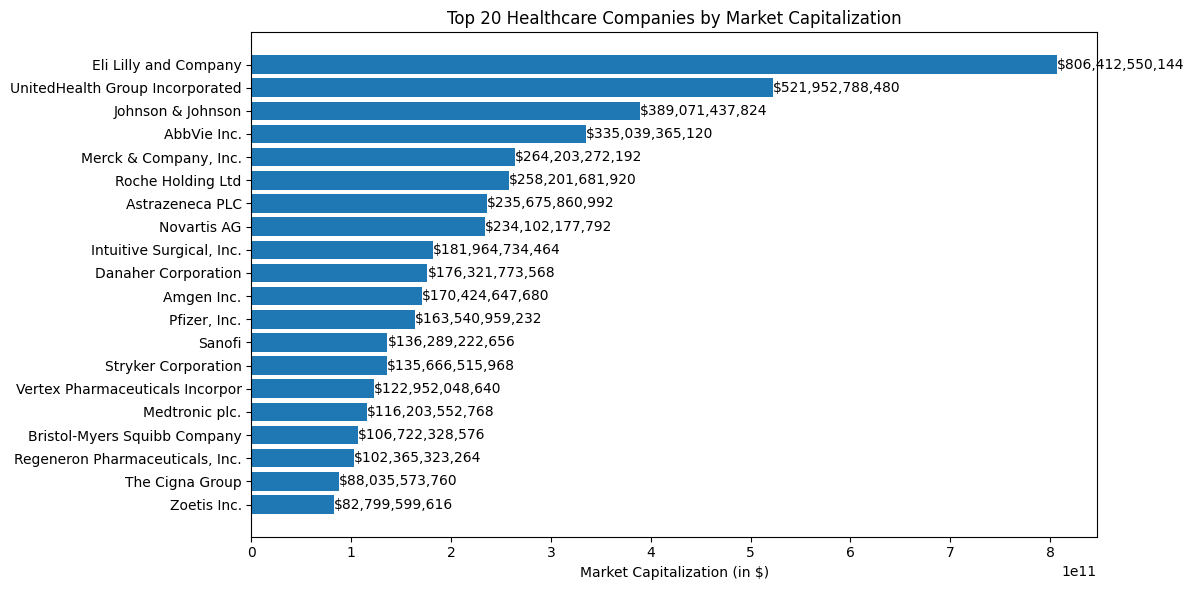

In [24]:
import matplotlib.pyplot as plt

# Sort the data by marketCap and take the top 20 companies
top_companies = financial_data.head(20)

# Convert the marketCap column to a numeric format for plotting
market_caps = top_companies['marketCap'].apply(lambda x: float(x.replace('$', '').replace(',', '')))

# Plot a bar chart for the top 15 companies by market capitalization
plt.figure(figsize=(12, 6))
bars = plt.barh(top_companies['Company'], market_caps)

# Add the market capitalization values on the bars
for index, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"${market_caps.iloc[index]:,.0f}", va='center')

# Set labels and title
plt.xlabel('Market Capitalization (in $)')
plt.title('Top 20 Healthcare Companies by Market Capitalization')
plt.gca().invert_yaxis()  # Invert the y-axis to show the largest company at the top

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# # Drop any rows where fullTimeEmployees is 'N/A' and convert the column to numeric
# employee_data = financial_data[financial_data['fullTimeEmployees'] != 'N/A']
# employee_data['fullTimeEmployees'] = pd.to_numeric(employee_data['fullTimeEmployees'], errors='coerce')

# # Take the top 10 companies with the highest number of employees
# top_employers = employee_data.nlargest(10, 'fullTimeEmployees')

# # Function to display both percentage and number of employees in each pie chart slice
# def pie_label_func(pct, all_values):
#     absolute = int(np.round(pct / 100. * np.sum(all_values)))
#     return f"{pct:.1f}%\n({absolute:,})"

# # Plot a pie chart
# plt.figure(figsize=(9, 9))
# plt.pie(
#     top_employers['fullTimeEmployees'],
#     labels=top_employers['Company'],
#     autopct=lambda pct: pie_label_func(pct, top_employers['fullTimeEmployees']),
#     startangle=140
# )
# plt.title('Distribution of Full-Time Employees in Top 10 Healthcare Companies')
# plt.tight_layout()
# plt.show()


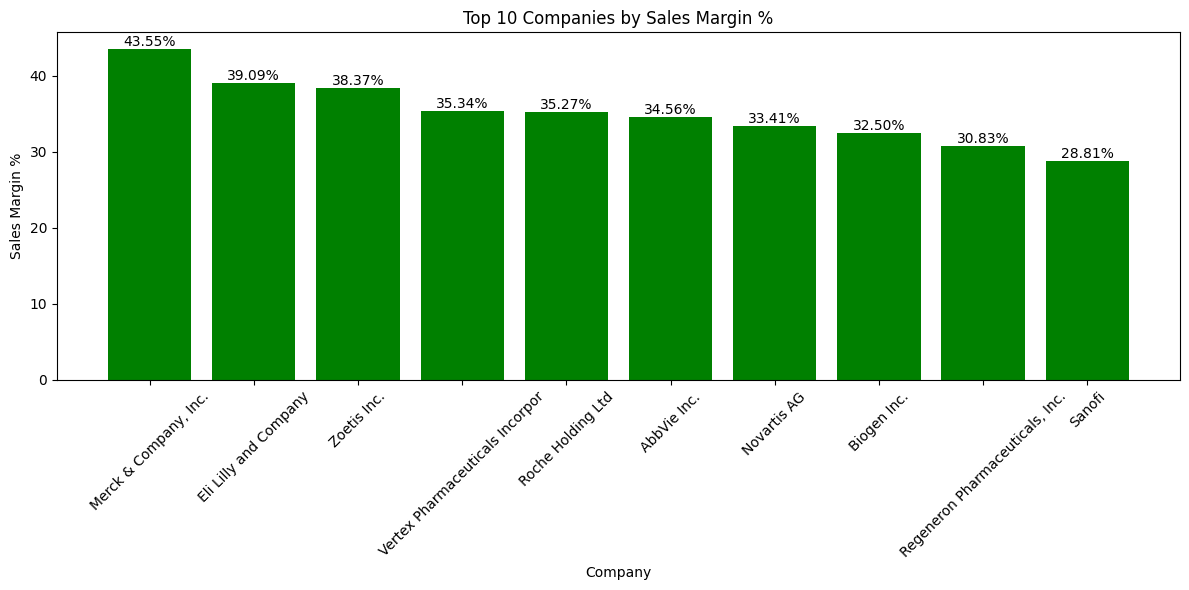

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'N/A' is replaced with NaN and convert sales_margin_% to string type first
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].replace('N/A', np.nan)

# Convert only valid string entries, ignoring NaN, and strip the '%' symbol
financial_data['sales_margin_%'] = financial_data['sales_margin_%'].apply(
    lambda x: str(x).rstrip('%') if isinstance(x, str) else x
).astype('float')

# Take the top 10 companies based on sales margin %
top_sales_margin = financial_data.nlargest(10, 'sales_margin_%')

# Plot a bar chart with expanded x-axis
plt.figure(figsize=(12, 6))  # Expand the width of the figure for better readability
bars = plt.bar(top_sales_margin['Company'], top_sales_margin['sales_margin_%'], color='green')

# Add labels to the bars to show the exact values of sales margin %
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Sales Margin %')
plt.title('Top 10 Companies by Sales Margin %')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust the layout to prevent labels from being cut off
plt.show()


In [25]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming you have loaded your DataFrame `financial_data` with a 'Company' and 'sales_margin_%' columns.

# # Step 1: Extract only the necessary columns
# df = financial_data[['Company', 'sales_margin_%']].copy()

# # Step 2: Replace 'N/A' with NaN and then fill NaN with 0
# df['sales_margin_%'] = df['sales_margin_%'].replace('N/A', np.nan).str.replace('%', '')
# df['sales_margin_%'] = pd.to_numeric(df['sales_margin_%'], errors='coerce').fillna(0)

# # Step 3: Normalize the Sales Margin % for the radar chart
# max_sales_margin = df['sales_margin_%'].max()
# df['normalized_sales_margin'] = df['sales_margin_%'] / max_sales_margin

# # Step 4: Prepare data for radar chart
# labels = df['Company'].tolist()  # List of companies for the radar chart
# num_vars = len(labels)

# # Define the angle of each axis in the plot (equal distribution of angles)
# angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# # The plot is circular, so we need to "close the plot" by appending the first element to the end
# values = df['normalized_sales_margin'].tolist()
# values += values[:1]
# angles += angles[:1]

# # Step 5: Plot the radar chart
# fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# # Plot the normalized sales margin for each company
# ax.plot(angles, values, linewidth=2, linestyle='solid', label='Sales Margin % (Normalized)')
# ax.fill(angles, values, alpha=0.3)

# # Set the category labels
# ax.set_yticklabels([])  # Hide radial labels
# ax.set_xticks(angles[:-1])  # Skip the last angle for labels
# ax.set_xticklabels(labels, fontsize=10, rotation=45)

# # Add annotations for each sales margin percentage
# for i, (angle, value, margin) in enumerate(zip(angles, values, df['sales_margin_%'].tolist())):
#     # Adjust position for label slightly away from the plotted point
#     ax.text(angle, value + 0.05, f"{margin:.2f}%", ha='center', va='center', fontsize=8, color='black')

# # Add a title
# plt.title("Sales Margin % for Top 33 Healthcare Companies", pad=20)

# # Show the plot
# plt.tight_layout()
# plt.show()


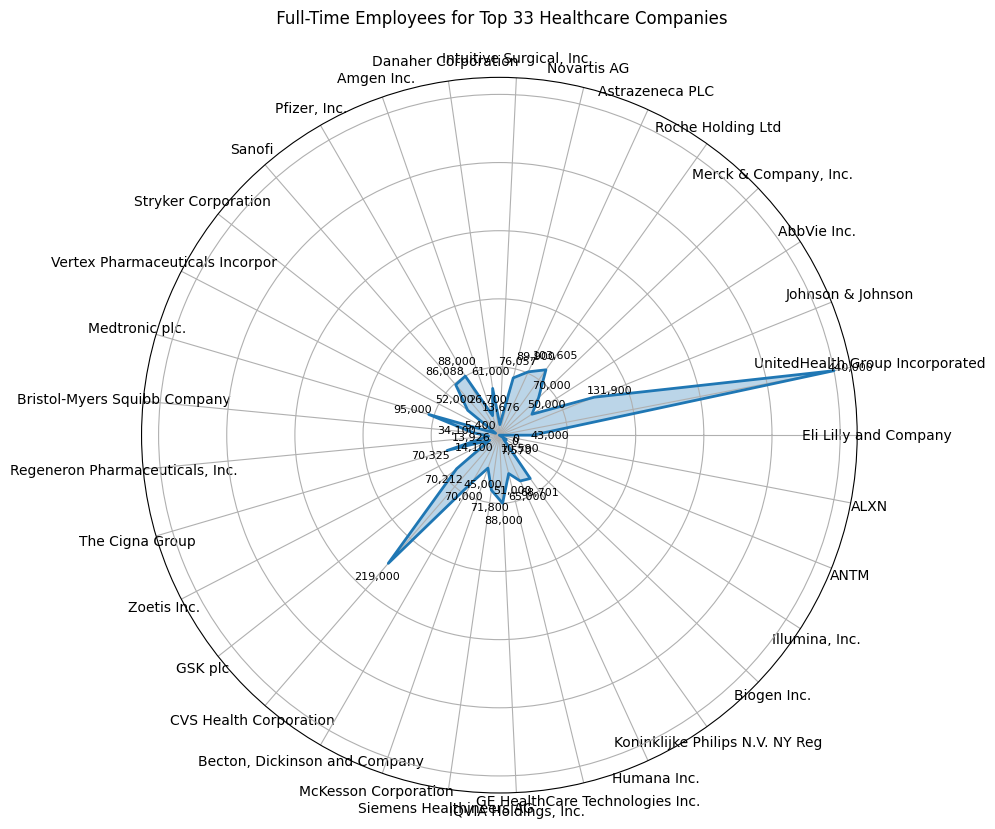

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your DataFrame `financial_data` with 'Company' and 'fullTimeEmployees' columns.

# Step 1: Extract only the necessary columns
df = financial_data[['Company', 'fullTimeEmployees']].copy()

# Step 2: Replace 'N/A' with NaN and then fill NaN with 0
df['fullTimeEmployees'] = pd.to_numeric(df['fullTimeEmployees'], errors='coerce').fillna(0)

# Step 3: Normalize the full-time employees for the radar chart
max_employees = df['fullTimeEmployees'].max()
df['normalized_employees'] = df['fullTimeEmployees'] / max_employees

# Step 4: Prepare data for radar chart
labels = df['Company'].tolist()  # List of companies for the radar chart
num_vars = len(labels)

# Define the angle of each axis in the plot (equal distribution of angles)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the plot" by appending the first element to the end
values = df['normalized_employees'].tolist()
values += values[:1]
angles += angles[:1]

# Step 5: Plot the radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot the normalized full-time employees for each company
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Full-Time Employees (Normalized)')
ax.fill(angles, values, alpha=0.3)

# Set the category labels
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])  # Skip the last angle for labels
ax.set_xticklabels(labels, fontsize=10, rotation=45)

# Add annotations for each full-time employee count
for i, (angle, value, employee_count) in enumerate(zip(angles, values, df['fullTimeEmployees'].tolist())):
    # Adjust position for label slightly away from the plotted point
    ax.text(angle, value + 0.05, f"{int(employee_count):,}", ha='center', va='center', fontsize=8, color='black')

# Add a title
plt.title(" Full-Time Employees for Top 33 Healthcare Companies", pad=20)

# Show the plot
plt.tight_layout()
plt.show()
